# Problem: Logistic regression

In this exercice we consider students that apply to a Master program in an University. Their chance of being accepted depend on several criteria among which the marks they obtained to two exams (called Exam1 and Exam2).

We want to build a simple probabilistic model based only on the results obtained for these two exams. For this we use Logistic Regression to calculate the probability for a student to be accepted to the Master program given the marks he obtained for each exam:

$$\text{p(accepted)} = \sigma(w_0 + w_1 \cdot \text{Exam1} + w_2 \cdot \text{Exam2})$$

By analysing the success rate of the applicants of the previous years it was possible to determine the weights of this model, and these were estimated to be:

$$ w_0 = -44.997, w_1 = 0.36357, w_2 = 0.35662$$

In this exercice we would like to estimate the probability of 100 new students to be accepted to the Master program given the marks that they obtained to their exams.

Data taken from:
https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24


### Initialize

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## 0) Question on lecture [1pt]

Explain how the model is trained:

a) What is the loss function used here and why ?

b) What method is used to minimize the loss function ?

c) How are determined the weights $w_0$, $w_1$ and $w_2$ ?


## 1) The data [1pt]
The text file below contains the marks obtained at the two exams by 100 students. 

a) Print the first 10 entries of the file.

b) Represent this dataset on a figure with two axes: Exam1 and Exam2.

     Exam1      Exam2
[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]
 [45.08327748 56.31637178]
 [61.10666454 96.51142588]
 [75.02474557 46.55401354]
 [76.0987867  87.42056972]
 [84.43281996 43.53339331]]


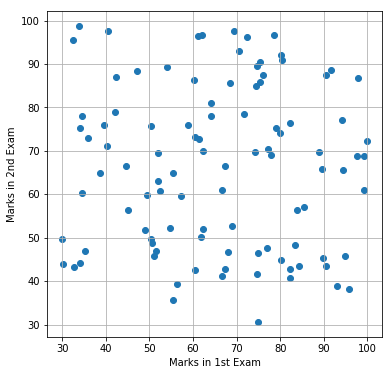

In [15]:
# Load and read file
from numpy import genfromtxt
student_marks = genfromtxt('marks_nolabels.txt', delimiter=',')

# Print first 10 entries
print('%10s %10s'% ('Exam1', 'Exam2'))
print(student_marks[:10,:])

# Show data
plt.figure(figsize=(6,6))
plt.scatter(student_marks[:,0],student_marks[:,1])
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.grid()
plt.show()

## 2) The model [1 pt]

a) Write two functions, `sigmoid(x)` and `dsig(x)` that returns, respectively $\sigma(x)$ and $\frac{\text{d} \sigma}{\text{d} x}(x)$.

b) Write a function `predict` that returns the probability for each student to be accepted by the University.

In [16]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def dsig(x):
    return sigmoid(x)*(1-sigmoid(x))

def predict(features, weights):
    '''
    Returns 1D array of probabilities
    that the class label == 1
    '''
    z = np.dot(features, weights)
    return sigmoid(z)


## 3) Probabilities [4 pts = 3+1]

a) With the values of the weights $w_0,w_1,w_2$ given above calculate the probability for each student to be accepted. Represent the distribution of all probabilities in a histogram.

b) For a threshold of p(accepted) = 0.5 how many how many students are predicted to pass or fail the acceptation at the University ?

N fail=41 pass=59


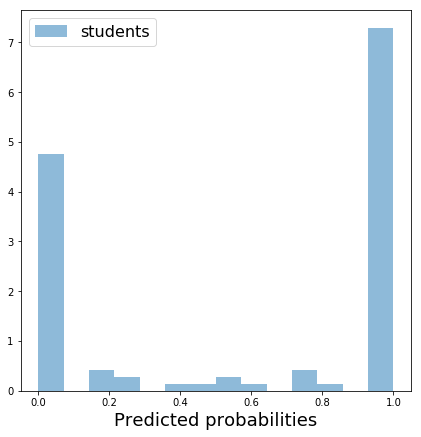

In [17]:
# Extend data features: [1, Exam1, Exam2]
bias = np.ones(shape=(len(student_marks),1))
features = np.append(bias, student_marks, axis=1)

# Weight vector
weights = np.array([-44.997, 0.36357,0.35662])

# Prediction
predicted_probabilities = predict(features, weights)

# Show histogram
plt.figure(figsize=(7, 7))
bins = np.linspace(0,1,15)
n, bins, patches = plt.hist(predicted_probabilities, bins, alpha=0.5, label='students', normed=1)
plt.xlabel('Predicted probabilities',fontsize=18)
plt.legend(loc='best',fontsize=16)

# number of students who pass/fail
n_fail = predicted_probabilities[predicted_probabilities<0.5].shape[0]
n_pass = predicted_probabilities[predicted_probabilities>0.5].shape[0]
print('N fail=%d pass=%d' % (n_fail,n_pass))

## 4) Results [4 pts = 2+1+1]

a) Represent the data in a figure with two axes (Exam1 and Exam2). Show with a red marker students that are predicted to fail the admission and with a blue marker students who are predicted to pass.

b) Modify this figure showing this time the markers with a color depending on the probability value: from dark red for low probabilities to dark blue for high probabilities.

c) Add a line showing the decision boundary separing both classes.  Hint: this line correspond to points for which p(accepted)=0.5, that is, students for which the weighted sum is such that $(w_0 + w_1 \cdot \text{Exam1} + w_2 \cdot \text{Exam2})=0$.

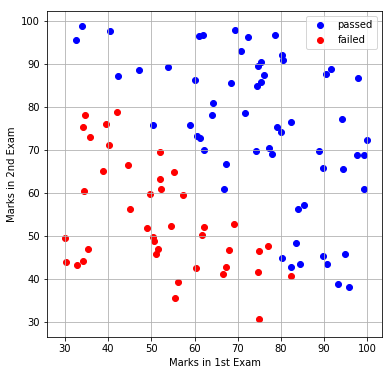

In [25]:
# Show data in two classes
plt.figure(figsize=(6,6))
plt.scatter(student_marks[predicted_probabilities>0.5][:,0],student_marks[predicted_probabilities>0.5][:,1],c='blue',label='passed')
plt.scatter(student_marks[predicted_probabilities<0.5][:,0],student_marks[predicted_probabilities<0.5][:,1],c='red',label='failed')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.grid()
plt.show()

c) If the weighted sum of inputs is greater than zero, the predicted class is 1 and vice-versa. So the decision boundary separating both the classes can be found by setting the weighted sum of inputs to 0.
As there are two features in our dataset, the model can be represented by,

$$y(x) = \sigma(w_0 + w_1 x_1 + w_2 x_2)$$

The decision boundary can be found by setting the weighted sum of inputs to 0. Equating the linear sum to 0 gives us:

$$x_2 = -\frac{w_0 + w_1 x_1}{w_2}$$


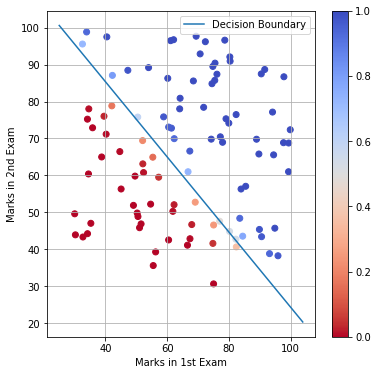

In [24]:
# Decision boundary
x_values = [np.min(features[:, 1] - 5), np.max(features[:, 2] + 5)]
y_values = - (weights[0] + np.dot(weights[1], x_values)) / weights[2]

# Show plot with marker color depending on probability
plt.figure(figsize=(6,6))
plt.scatter(features[:,1],features[:,2],c=predicted_probabilities,cmap='coolwarm_r',vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.grid()
plt.plot(x_values, y_values, label='Decision Boundary')
plt.legend(loc='upper right',fontsize=10)
plt.show()

************************************************

# Exercices

All questions below are independent of each other. 

## 1) Neural network with Pytorch [3pts = 1+1+1]

Look at the pytorch implementation of a fully connected neural network below (do not try to run the cell). 

a) How is called this specific NN architecture ? In which cases can it be used ?

b) How many weights, including bias terms, need to be determined for each layer and in total for this network ?

c) Modify the code by introducing two layers of dimension `hidden_layer2=25` with a sigmoid activitation function.
Be careful to respect this specific NN architecture.

```python
input_dim = 100
hidden_layer1 = 50
latence_space=10
net = torch.nn.Sequential(
    torch.nn.Linear(input_dim, hidden_layer1),     
    torch.nn.ReLU(),                              
    torch.nn.Linear(hidden_layer1, latence_space),            
    torch.nn.ReLU(),                              
    torch.nn.Linear(latence_space,hidden_layer1),                     
    torch.nn.ReLU(),                              
    torch.nn.Linear(hidden_layer1, input_dim),            
)
```

Answers

a) Autoencoder. Used for data compression and anomaly detection.

b) number of weights = (100x50 + 50) + (50x10+10) + (10x50 +50) + (50x100 + 100) = 11210

c) 
```python
input_dim = 100
hidden_layer1 = 50
hidden_layer2 = 25
latence_space=10
net = torch.nn.Sequential(
    torch.nn.Linear(input_dim, hidden_layer1),     
    torch.nn.ReLU(),                              
    torch.nn.Linear(hidden_layer1, hidden_layer2),            
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_layer2, latence_space),            
    torch.nn.ReLU(),                              
    torch.nn.Linear(latence_space,hidden_layer2),                     
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_layer2,hidden_layer1),                     
    torch.nn.ReLU(),                              
    torch.nn.Linear(hidden_layer1, input_dim),            
)
```

## 2) Implementation of a simple NN with Numpy [5 pts = 4 (fwd,bckwd,update,res) + 1 (res)]

In the chap.3 of the lectures, pages 54-56, a very simple example of NN calculation is shown:

<center><img src="simple-nn.jpeg" width="800" /></center>

a) Implement this example, using **only** the `numpy` library, and check you obtain the same results as in page 56 after 1 iteration. For this define all necessary functions, apply forward pass and backward pass, etc.

b) Give the result (weights, output value) for another iteration. 

Forward propagation:
$$
{\bf x} \rightarrow {\bf s^{(1)}} = {\bf W x + b} \rightarrow {\bf x^{(1)}} = \sigma({\bf s^{(1)}}) \rightarrow {\bf s^{(2)}} = {\bf W' x + b'} \rightarrow {\bf y = x^{(2)}} = \sigma({\bf s^{(2)}})
$$

Loss function:
$$\ell = (y-t)^2$$

Backward propagation:

$$
\frac{\partial \ell}{\partial {\bf W'}} = \frac{\partial \ell}{\partial y} \frac{\partial {\bf y}}{\partial {\bf s^{(2)}}} \frac{\partial {\bf s^{(2)}}}{\partial {\bf W'}} \Rightarrow \frac{\partial \ell}{\partial W'_i} = \frac{\partial \ell}{\partial y} \frac{\partial y}{\partial s^{(2)}} \frac{\partial s^{(2)}}{\partial W'_i} = 2(y-t) \sigma'(s^{(2)}) x_i^{(1)}
$$

$$
\frac{\partial \ell}{\partial {\bf W}} = \frac{\partial \ell}{\partial {\bf y}} \frac{\partial {\bf y}}{\partial {\bf s^{(2)}}} \frac{\partial {\bf s^{(2)}}}{\partial {\bf x^{(1)}}} \frac{\partial {\bf x^{(1)}}}{\partial {\bf s^{(1)}}} \frac{\partial {\bf s^{(1)}}}{\partial {\bf W}} \Rightarrow \frac{\partial \ell}{\partial W_{ij}} = \frac{\partial \ell}{\partial y} \frac{\partial y}{\partial s^{(2)}} \frac{\partial s^{(2)}}{\partial x_i^{(1)}} \frac{\partial x_i^{(1)}}{\partial s_i^{(1)}} \frac{\partial s^{(1)}}{\partial W_{ij}} = 2(y-t) \sigma'(s^{(2)}) W'_{i} \sigma'(s^{(1)}_i) x_{j}
$$

For $\frac{\partial \ell}{\partial {\bf b'}}$ and $\frac{\partial \ell}{\partial {\bf b}}$ derivatives we have the same expressions as above where the final term ($x^{(1)}$ and $x$, respectively) is replaced by 1:
$$
\frac{\partial \ell}{\partial b'} = \frac{\partial \ell}{\partial y} \frac{\partial y}{\partial s^{(2)}} \frac{\partial s^{(2)}}{\partial b'} = 2(y-t) \sigma'(s^{(2)}),
$$

$$
\frac{\partial \ell}{\partial b_i} = \frac{\partial \ell}{\partial y} \frac{\partial y}{\partial s^{(2)}} \frac{\partial s^{(2)}}{\partial x_i^{(1)}} \frac{\partial x_i^{(1)}}{\partial s_i^{(1)}} \frac{\partial s^{(1)}}{\partial b_i} = 2(y-t) \sigma'(s^{(2)}) W'_{i} \sigma'(s^{(1)}_i)
$$

Note: In practice for the implementation of $\frac{\partial \ell}{\partial {\bf W}}$ we proceed as follow:

$$
\frac{\partial \ell}{\partial W_{ij}} = \left( 2(y-t) \sigma'(s^{(2)}) W'_{i} \sigma'(s^{(1)}_i) \right) x_{j} = dW_i \, x_j
$$
Hence:

$$
\frac{\partial \ell}{\partial {\bf W}} = \begin{pmatrix} dW_1 \\ dW_2 \end{pmatrix} \left( x_1 \,\, x_2 \right) = \begin{pmatrix} dW_1 x_1 & dW_1 x_2 \\ dW_2 x_1 & dW_2 x_2 \end{pmatrix} 
$$



In [9]:
import numpy as np

# Input data
x = np.array([0.2,0.3])

# target value
t  = np.array([0.])

# Initial weights
W1 = np.array([[0.1,0.2],[0.3,0.4]])
b1 = np.array([0.5,0.5])
W2 = np.array([0.5,0.6])
b2 = np.array([0.5])

# Learning rate
eta = 1

In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def loss(y,t):
    return (y-t)**2

def dloss(y,t):
    return 2*(y-t)

def dsig(x):
    return sigmoid(x)*(1-sigmoid(x))

# FWD propagation
def forward(x,W1,b1,W2,b2,t):
    s1 = np.matmul(W1,x) + b1
    x1 = sigmoid(s1)
    print('s1',s1,'x1',x1)
    s2 = np.matmul(W2,x1) + b2
    x2 = sigmoid(s2)
    print('s2',s2,'x2',x2)
    cost=loss(x2,t)
    print('\nfwd pass: y = %.3f, cost = %.3f\n' %(x2,cost))
    return s1,x1,s2,x2,cost

def backprop(x,x1,s1,s2,W2,y,t):
    dW2 = dloss(y,t) * dsig(s2)*x1
    print('dl/dW2 = ',dW2)
    
    db2 = dloss(y,t) * dsig(s2)
    print('dl/db2 = ',db2)

    dW  = dloss(y,t) * dsig(s2) * W2 * dsig(s1)
    dW1 = dW.reshape(2,1).dot(x.reshape(1,2))
    print('dl/dW1 = \n',dW1)
    
    db1 = dW
    print('dl/db1 = \n',db1)
    
    return dW1,db1,dW2,db2

def update(W1,b1,W2,b2,dW1,dW2,db1,db2):
    # Updated weights
    W1 -= eta*dW1
    W2 -= eta*dW2
    b1 -= eta*db1
    b2 -= eta*db2
    return W1,b1,W2,b2

def iterate(x,W1,b1,W2,b2,t):
    s1,x1,s2,x2,cost = forward(x,W1,b1,W2,b2,t)
    dW1,db1,dW2,db2=backprop(x,x1,s1,s2,W2,x2,t)
    W1,b1,W2,b2=update(W1,b1,W2,b2,dW1,dW2,db1,db2)
    return W1,b1,W2,b2

In [11]:
# 1st iteration
print('1st iteration')
W1,b1,W2,b2 = iterate(x,W1,b1,W2,b2,t)
print('--> New weights W1,b1,W2,b2:\n',W1,b1,W2,b2)

# 2nd iteration
print('\n2nd iteration')
W1,b1,W2,b2 = iterate(x,W1,b1,W2,b2,t)
print('--> New weights W1,b1,W2,b2:\n',W1,b1,W2,b2)
_,_,_,_,_=forward(x,W1,b1,W2,b2,t)

1st iteration
s1 [0.58 0.68] x1 [0.64106741 0.6637387 ]
s2 [1.21877692] x2 [0.77184824]

fwd pass: y = 0.772, cost = 0.596

dl/dW2 =  [0.17426949 0.18043251]
dl/db2 =  [0.27184269]
dl/dW1 = 
 [[0.0062551  0.00938265]
 [0.0072807  0.01092104]]
dl/db1 = 
 [0.0312755  0.03640348]
--> New weights W1,b1,W2,b2:
 [[0.0937449  0.19061735]
 [0.2927193  0.38907896]] [0.4687245  0.46359652] [0.32573051 0.41956749] [0.22815731]

2nd iteration
s1 [0.54465869 0.63886406] x1 [0.63289548 0.65449664]
s2 [0.70891619] x2 [0.67016163]

fwd pass: y = 0.670, cost = 0.449

dl/dW2 =  [0.18750907 0.19390888]
dl/db2 =  [0.29627178]
dl/dW1 = 
 [[0.00448436 0.00672654]
 [0.00562188 0.00843282]]
dl/db1 = 
 [0.0224218  0.02810942]
--> New weights W1,b1,W2,b2:
 [[0.08926054 0.18389081]
 [0.28709742 0.38064613]] [0.4463027 0.4354871] [0.13822144 0.2256586 ] [-0.06811447]
s1 [0.51932205 0.60710042] x1 [0.62698923 0.64727909]
s2 [0.16461298] x2 [0.54106057]

fwd pass: y = 0.541, cost = 0.293



## 3) Regression [1 pt]

Describe the figure below. What is the difference between these models ? Which one seems to generalize better ?

By the way is this figure an example of linear regression ? Why ?

<center><img src="fit.png" width="600" /></center>
